In [1]:
import tensorflow as tf 
from tensorflow import keras 
import matplotlib.pyplot as plt 
import numpy as np 
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential 

In [2]:
#pip install opencv-python

In [3]:
import PIL
import cv2
import os

In [4]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin = dataset_url, cache_dir = '.', untar = True)

In [5]:
data_dir

'.\\datasets\\flower_photos'

In [6]:
import pathlib 
data_dir = pathlib.Path(data_dir)

In [7]:
data_dir

WindowsPath('datasets/flower_photos')

In [8]:
img_count = len(list(data_dir.glob('*/*.jpg')))
img_count

3670

In [9]:
roses = list(data_dir.glob('roses/*'))
roses[:3]

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg')]

In [10]:
str(roses[0])

'datasets\\flower_photos\\roses\\10090824183_d02c613f10_m.jpg'

In [11]:
roses[0]

WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg')

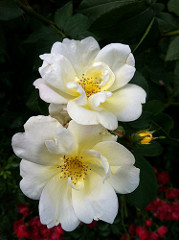

In [12]:
PIL.Image.open(str(roses[0]))

In [13]:
Classes = ['roses','dandelion','daisy', 'sunflowers','tulips']

In [14]:
 plant = {
        'roses': list(data_dir.glob('roses/*')),
        'dandelion': list(data_dir.glob('dandelion/*')),
        'daisy': list(data_dir.glob('daisy/*')),
        'sunflowers': list(data_dir.glob('sunflowers/*')),
        'tulips': list(data_dir.glob('tulips/*'))
    }

plant_index = {
    'roses': 0,
    'dandelion': 1,
    'daisy': 2,
    'sunflowers': 3,
    'tulips': 4,
    
}
                       
                       


In [15]:
plant["roses"][:5]

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

In [16]:
def flower(flower_type, index):
    plant = {
            'roses': list(data_dir.glob('roses/*')),
            'dandelion': list(data_dir.glob('dandelion/*')),
            'daisy': list(data_dir.glob('daisy/*')),
            'sunflowers': list(data_dir.glob('sunflowers/*')),
            'tulips': list(data_dir.glob('tulips/*'))
        }


    return PIL.Image.open(str(plant[flower_type][index]))

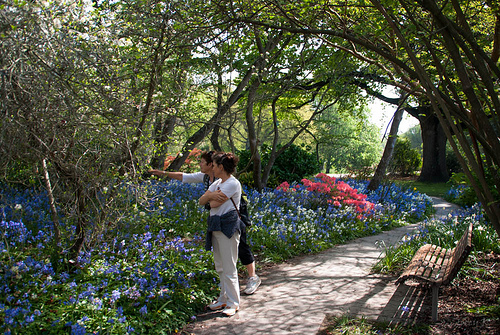

In [17]:
flower("tulips",  2)

# img conversion into numpy array

In [18]:
img = cv2.imread(str(plant['roses'][0]))

In [19]:
img

array([[[ 0, 15,  6],
        [ 0, 15,  6],
        [ 0, 17,  8],
        ...,
        [24, 51, 31],
        [25, 52, 32],
        [26, 53, 33]],

       [[ 7, 22, 14],
        [ 7, 22, 14],
        [ 6, 21, 13],
        ...,
        [20, 46, 30],
        [23, 49, 33],
        [25, 51, 35]],

       [[12, 23, 15],
        [12, 23, 15],
        [11, 22, 14],
        ...,
        [20, 42, 30],
        [23, 45, 33],
        [26, 48, 36]],

       ...,

       [[19, 30, 27],
        [14, 24, 18],
        [12, 20, 13],
        ...,
        [ 4, 13,  3],
        [ 0,  8,  1],
        [ 0,  5,  0]],

       [[19, 30, 28],
        [18, 27, 24],
        [15, 23, 16],
        ...,
        [ 3, 12,  2],
        [ 1,  9,  2],
        [ 0,  7,  2]],

       [[ 9, 19, 19],
        [17, 25, 24],
        [22, 29, 24],
        ...,
        [ 1, 12,  2],
        [ 2, 10,  3],
        [ 3, 11,  4]]], dtype=uint8)

In [20]:
X,y = [],[]
for flower_names, images in plant.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(plant_index[flower_names])

In [21]:
X[:5]

[array([[[ 1, 16,  7],
         [ 1, 16,  7],
         [ 1, 17,  9],
         ...,
         [23, 50, 31],
         [25, 51, 32],
         [26, 52, 33]],
 
        [[10, 23, 15],
         [10, 23, 15],
         [ 9, 22, 14],
         ...,
         [20, 44, 30],
         [23, 47, 33],
         [26, 50, 36]],
 
        [[13, 20, 13],
         [12, 20, 13],
         [11, 19, 12],
         ...,
         [21, 43, 30],
         [22, 45, 31],
         [25, 48, 34]],
 
        ...,
 
        [[12, 24, 18],
         [11, 22, 15],
         [12, 21, 11],
         ...,
         [ 7, 14,  7],
         [ 2,  8,  2],
         [ 0,  2,  0]],
 
        [[19, 30, 28],
         [16, 26, 21],
         [14, 22, 15],
         ...,
         [ 3, 12,  2],
         [ 0,  8,  1],
         [ 0,  6,  1]],
 
        [[11, 21, 20],
         [17, 25, 24],
         [21, 28, 23],
         ...,
         [ 1, 12,  2],
         [ 2, 10,  3],
         [ 3, 10,  4]]], dtype=uint8),
 array([[[13, 18, 17],
         [11, 13, 1

In [22]:
y[-10:]

[4, 4, 4, 4, 4, 4, 4, 4, 4, 4]

In [23]:
X = np.array(X)
y = np.array(y)

In [24]:
X[:4]

array([[[[  1,  16,   7],
         [  1,  16,   7],
         [  1,  17,   9],
         ...,
         [ 23,  50,  31],
         [ 25,  51,  32],
         [ 26,  52,  33]],

        [[ 10,  23,  15],
         [ 10,  23,  15],
         [  9,  22,  14],
         ...,
         [ 20,  44,  30],
         [ 23,  47,  33],
         [ 26,  50,  36]],

        [[ 13,  20,  13],
         [ 12,  20,  13],
         [ 11,  19,  12],
         ...,
         [ 21,  43,  30],
         [ 22,  45,  31],
         [ 25,  48,  34]],

        ...,

        [[ 12,  24,  18],
         [ 11,  22,  15],
         [ 12,  21,  11],
         ...,
         [  7,  14,   7],
         [  2,   8,   2],
         [  0,   2,   0]],

        [[ 19,  30,  28],
         [ 16,  26,  21],
         [ 14,  22,  15],
         ...,
         [  3,  12,   2],
         [  0,   8,   1],
         [  0,   6,   1]],

        [[ 11,  21,  20],
         [ 17,  25,  24],
         [ 21,  28,  23],
         ...,
         [  1,  12,   2],
        

In [25]:
#!pip install scikit-learn

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [27]:
y_test[:4]

array([0, 3, 4, 1])

In [28]:
X_train = X_train/255
X_test = X_test/255

In [49]:

model = Sequential([
    layers.Conv2D(20, 3, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(30, 3, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(100, activation = "relu"),
    layers.Dense(5, activation = 'softmax')
    
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']

)

model.fit(X_train, y_train, epochs = 10)

Epoch 1/10
92/92 [==============================] - 98s 630ms/step - loss: 1.6033 - accuracy: 0.4312
Epoch 2/10
92/92 [==============================] - 58s 629ms/step - loss: 1.0059 - accuracy: 0.6059
Epoch 3/10
92/92 [==============================] - 58s 635ms/step - loss: 0.7506 - accuracy: 0.7251
Epoch 4/10
92/92 [==============================] - 58s 634ms/step - loss: 0.4510 - accuracy: 0.8552
Epoch 5/10
92/92 [==============================] - 60s 650ms/step - loss: 0.2312 - accuracy: 0.9264
Epoch 6/10
92/92 [==============================] - 63s 688ms/step - loss: 0.1141 - accuracy: 0.9755
Epoch 7/10
92/92 [==============================] - 62s 670ms/step - loss: 0.0497 - accuracy: 0.9894
Epoch 8/10
92/92 [==============================] - 62s 669ms/step - loss: 0.0286 - accuracy: 0.9959
Epoch 9/10
92/92 [==============================] - 61s 663ms/step - loss: 0.0228 - accuracy: 0.9966
Epoch 10/10
92/92 [==============================] - 62s 674ms/step - loss: 0.0242 - accura

In [50]:
model.evaluate(X_test, y_test)

23/23 [==============================] - 5s 213ms/step - loss: 1.7706 - accuracy: 0.6090


[1.7706230878829956, 0.608991801738739]

In [51]:
y_pred = model.predict(X_test)

In [52]:
y_pred[:5]

array([[3.0100736e-01, 9.3059520e-05, 1.6881123e-06, 8.4571932e-03,
        6.9044071e-01],
       [8.4877001e-07, 1.4183703e-06, 6.9669723e-09, 9.9998701e-01,
        1.0744270e-05],
       [8.8304840e-04, 6.9606700e-03, 9.0244348e-04, 8.6566073e-01,
        1.2559317e-01],
       [2.0406225e-05, 9.9957532e-01, 3.9744700e-04, 1.0246690e-06,
        5.6640374e-06],
       [1.4307082e-04, 9.7378898e-01, 2.5376011e-02, 7.4324962e-05,
        6.1753951e-04]], dtype=float32)

In [53]:
y_predicted = [np.argmax(i) for i in y_pred]

In [54]:
y_predicted[:5]

[4, 3, 3, 1, 1]

In [55]:
y_test[:5]

array([0, 3, 4, 1, 1])

In [56]:
from sklearn.metrics import confusion_matrix, classification_report
print('Classification Report', classification_report(y_test, y_predicted))
print('Confusion_matrix', confusion_matrix(y_test, y_predicted))

Classification Report               precision    recall  f1-score   support

           0       0.55      0.58      0.56       150
           1       0.66      0.65      0.66       169
           2       0.57      0.56      0.56       129
           3       0.70      0.72      0.71       129
           4       0.57      0.54      0.56       157

    accuracy                           0.61       734
   macro avg       0.61      0.61      0.61       734
weighted avg       0.61      0.61      0.61       734

Confusion_matrix [[ 87  10  17   5  31]
 [  8 110  26  16   9]
 [ 14  24  72   8  11]
 [  8  11   4  93  13]
 [ 42  11   8  11  85]]


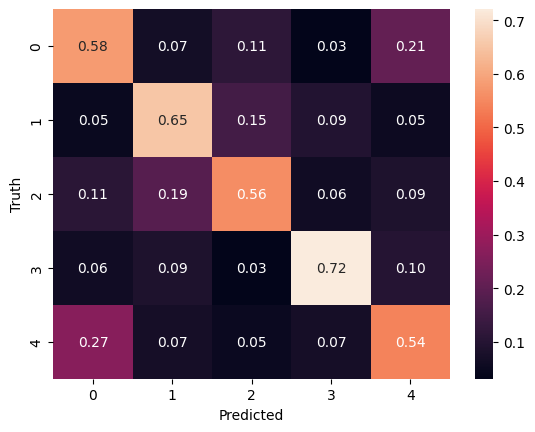

In [57]:
cm = confusion_matrix(y_test, y_predicted)
cm = cm.astype('float')/ cm.sum(axis  = 1)[:, np.newaxis]
import seaborn as sn
sn.heatmap(cm, fmt = '.2f', annot = True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [38]:
tf.__version__

'2.6.0'

In [39]:
! pip install tensorflow --upgrade

In [40]:
import tensorflow as tf
import numpy
print(tf.__version__)
print(numpy.version.version)

2.6.0
1.19.5


# Data Augmentation 

In [41]:
data_augmentation = keras.Sequential([
    layers.experimental.preprocessing.RandomContrast(0.3),
    layers.experimental.preprocessing.RandomZoom(0.3),
    layers.experimental.preprocessing.RandomRotation(0.3)
])

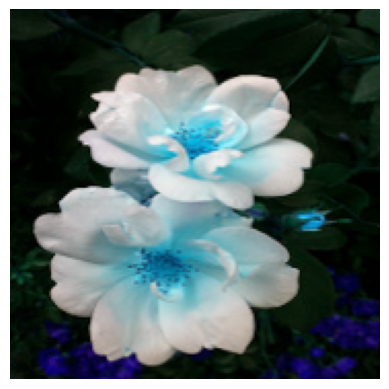

In [42]:
plt.axis('off')
plt.imshow(X[0])
plt.show()

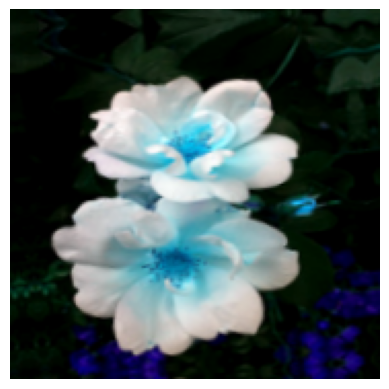

In [43]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0])
plt.show()

In [44]:
import numpy
numpy.version.version

'1.19.5'

In [45]:
#!pip install numpy==1.19

In [85]:

model_aug = Sequential([
    data_augmentation,
    layers.Conv2D(50, 3, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(60, 3, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(150, activation = "relu"),
    layers.Dense(5, activation = 'softmax')
    
])

model_aug.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']

)

model_aug.fit(X_train, y_train, epochs = 100)

Epoch 1/100
92/92 [==============================] - 182s 2s/step - loss: 1.8313 - accuracy: 0.3409
Epoch 2/100
92/92 [==============================] - 172s 2s/step - loss: 1.2248 - accuracy: 0.4959
Epoch 3/100
92/92 [==============================] - 197s 2s/step - loss: 1.1847 - accuracy: 0.5272
Epoch 4/100
92/92 [==============================] - 220s 2s/step - loss: 1.0606 - accuracy: 0.5855
Epoch 5/100
92/92 [==============================] - 188s 2s/step - loss: 1.0366 - accuracy: 0.5862
Epoch 6/100
92/92 [==============================] - 196s 2s/step - loss: 1.0199 - accuracy: 0.5998
Epoch 7/100
92/92 [==============================] - 190s 2s/step - loss: 0.9429 - accuracy: 0.6298
Epoch 8/100
92/92 [==============================] - 190s 2s/step - loss: 0.9133 - accuracy: 0.6383
Epoch 9/100
92/92 [==============================] - 189s 2s/step - loss: 0.9156 - accuracy: 0.6502
Epoch 10/100
92/92 [==============================] - 189s 2s/step - loss: 0.8821 - accuracy: 0.6570

92/92 [==============================] - 176s 2s/step - loss: 0.3789 - accuracy: 0.8682
Epoch 83/100
92/92 [==============================] - 194s 2s/step - loss: 0.3600 - accuracy: 0.8631
Epoch 84/100
92/92 [==============================] - 158s 2s/step - loss: 0.3560 - accuracy: 0.8699
Epoch 85/100
92/92 [==============================] - 158s 2s/step - loss: 0.3731 - accuracy: 0.8641
Epoch 86/100
92/92 [==============================] - 158s 2s/step - loss: 0.3498 - accuracy: 0.8709
Epoch 87/100
92/92 [==============================] - 166s 2s/step - loss: 0.3767 - accuracy: 0.8641
Epoch 88/100
92/92 [==============================] - 176s 2s/step - loss: 0.3433 - accuracy: 0.8740
Epoch 89/100
92/92 [==============================] - 163s 2s/step - loss: 0.3607 - accuracy: 0.8692
Epoch 90/100
92/92 [==============================] - 158s 2s/step - loss: 0.3624 - accuracy: 0.8702
Epoch 91/100
92/92 [==============================] - 159s 2s/step - loss: 0.3685 - accuracy: 0.8655
Epo

In [86]:
model_aug.evaluate(X_test, y_test)

23/23 [==============================] - 12s 437ms/step - loss: 1.0656 - accuracy: 0.7193


[1.0655609369277954, 0.7193460464477539]

In [87]:
y_pred = model_aug.predict(X_test)

In [88]:
y_predicted = [np.argmax(i) for i in y_pred]

In [89]:
y_test[:5]

array([0, 3, 4, 1, 1])

In [90]:
y_predicted[:5]

[4, 3, 4, 1, 1]

In [91]:
print('Classification report with data augmentation', classification_report(y_predicted, y_test))

Classification report with data augmentation               precision    recall  f1-score   support

           0       0.63      0.67      0.65       142
           1       0.69      0.81      0.75       144
           2       0.78      0.69      0.73       144
           3       0.81      0.79      0.80       131
           4       0.71      0.65      0.68       173

    accuracy                           0.72       734
   macro avg       0.72      0.72      0.72       734
weighted avg       0.72      0.72      0.72       734



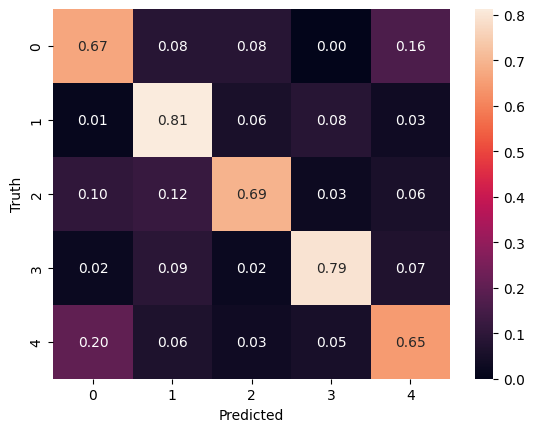

In [92]:
cm = confusion_matrix(y_predicted, y_test)
cm = cm.astype("float")/cm.sum(axis = 1)[:, np.newaxis]
sn.heatmap(cm, annot = True, fmt = ".2f")
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()